# Lending Club Case Study - Sreekumar N.P.

Problem Statement :
Lending Club requires me to analyze all patterns and dependencies of the Loan defaulters and provide them with recommendations to identify such applicants.

In [1]:
#import the libraries
import pandas as pd,numpy as np
import warnings
warnings.filterwarnings("ignore")
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step1 : Data Understanding

In [2]:
#read the dataset and check the first five rows to Check if the data in the data frame is consistent such that there 
#is no misplaced data between columns.

df1=pd.read_csv("loan.csv")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
df1.shape


(39717, 111)

In [4]:
#Check the information related to the dataframe to see if the quantitative values are int/float 
#and categorical is object / String

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Check statistical information of the dataframe to see if there are any ouliers through intuitive analysis and also to see where are 
#the most frequent values exist through median and quantile analysis.

df1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Inference from the data above : Seems the 25th,50th and 75th percentile of annual income is in the range of 10^4 where as the maximum is in the range of 10^6. This could mean there are outliers to the higher range. 

In [6]:
##Check the datatypes of all the columns of the dataframe
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Check if there are columns and rows which contains null values in it.

In [8]:
#Find columns having null values
df1.isnull().all().sum()

54

In [9]:
#Find columns with all null values and display it before making a decision to drop them.
df1_null=df1.loc[:,df1.isnull().all()]
df1_null.dtypes

mths_since_last_major_derog       float64
annual_inc_joint                  float64
dti_joint                         float64
verification_status_joint         float64
tot_coll_amt                      float64
tot_cur_bal                       float64
open_acc_6m                       float64
open_il_6m                        float64
open_il_12m                       float64
open_il_24m                       float64
mths_since_rcnt_il                float64
total_bal_il                      float64
il_util                           float64
open_rv_12m                       float64
open_rv_24m                       float64
max_bal_bc                        float64
all_util                          float64
total_rev_hi_lim                  float64
inq_fi                            float64
total_cu_tl                       float64
inq_last_12m                      float64
acc_open_past_24mths              float64
avg_cur_bal                       float64
bc_open_to_buy                    

# Step2 : Data Cleaning

In [10]:
#dropping columns with all null
df1=df1.dropna(axis=1,how='all')

In [11]:
#Check if the Coulmns with all null values in their rows are deleted.
df1.isnull().all().sum()


0

In [12]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

 # Inference from the data above : As more than ~90% of rows are null in mths_since_last_record ,next_pymnt_d, it is better to delete those columns.

In [13]:
#Delete Columns : mths_since_last_record ,mths_since_last_delinq 
df1 = df1.drop(columns = ['mths_since_last_record' ,'next_pymnt_d'])

In [14]:
#Find rows having null values
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [15]:
#Analyze the Tatget variable : loan_status to identify any irrelevant rows
df1.loan_status.isnull().sum()


0

In [16]:
# Find data within the series and number of instances of the data within 'loan_status'
df1.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
#Find the data type of columns
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [18]:
# interst rate dtype needs to be converted to a quantitative value for easy analysis.
df1.int_rate=df1.int_rate.str.replace('%','')
df1.int_rate.value_counts()
df1.int_rate=df1.int_rate.astype("float")
df1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
#Check and ensure that int_rate is changed to float64
df1.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [20]:
df1.dti.isnull().sum()

0

In [21]:
df1.emp_length.isnull().sum()

1075

In [22]:
df1.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [23]:
df1.emp_length.fillna(0,inplace = True)
df1.emp_length.isnull().sum()

0

In [24]:
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

# Note : At the beginning it was (39717, 111). After data cleaning of missing values and redundant columns, The remaining rows are 38577 and columns are 55.

# Data Cleaning phase is complete

# 3. Data Analysis

# From further investigation to gain domain experience the important variables identified are: 
1. Annual Income 
2. Loan Amount
3. Term
4. Grade
5. SubGrade
6. Loan Amount
7. Purpose of loan
8. DTI
9. Emp_length
10. Loan Date
11. Hpme Ownership
12. Verification_Status

There are customer behavioral variables present in the dataset, but that won't be available at the time of loan application hence can be ignored.


In [25]:
#As anaysis is on finding the factors that contribute for chargeoff, details related to 'Current' are irrelevant.
#So dropping them
df1 = df1.drop(df1[df1.loan_status == 'Current'].index)
df1.shape

(38577, 55)

# Quantitative Variables - Univariate Analysis

In [26]:
df1.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:>

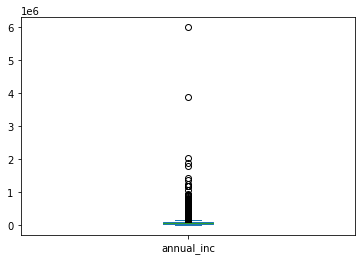

In [27]:
df1.annual_inc.plot.box()

In [28]:
#Remove the outliers from annual income
df1 = df1[df1.annual_inc < 1000000]

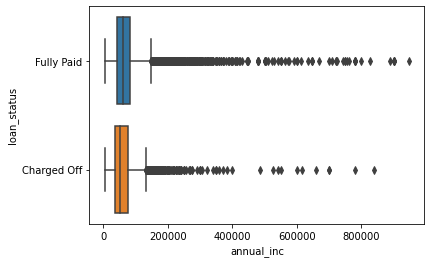

In [29]:
#Analyze the data relationship outliers between loan_status and annual income.
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

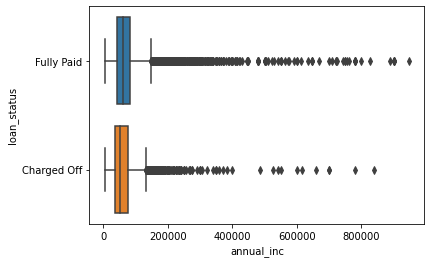

In [30]:
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

In [31]:
df2 = df1[(df1.annual_inc <1000000) & (df1.loan_status == 'Charged Off')]
df2.head()
df2.describe()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,5.626000e+03,5.626000e+03,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,5626.000000,...,5626.000000,5626.000000,5626.000000,5620.0,5626.0,5626.0,5620.0,5626.0,5508.000000,5625.0
mean,6.978205e+05,8.677217e+05,12103.732670,11752.683967,10863.652949,13.820579,336.170976,62216.211525,13.999236,0.170636,...,672.217754,87.580860,326.014998,0.0,1.0,0.0,0.0,0.0,0.067175,0.0
std,2.163887e+05,2.723416e+05,8086.302606,7761.020860,7662.154617,3.654721,217.070923,45079.747234,6.585339,0.535029,...,1720.873939,386.623347,529.029889,0.0,0.0,0.0,0.0,0.0,0.251794,0.0
min,6.141900e+04,8.035300e+04,900.000000,900.000000,0.000000,5.420000,22.790000,4080.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.297122e+05,6.848970e+05,5600.000000,5562.500000,5000.000000,11.295000,168.522500,37000.000000,9.050000,0.000000,...,0.000000,0.000000,112.827500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.969170e+05,8.881330e+05,10000.000000,10000.000000,9400.605813,13.610000,293.870000,53000.000000,14.290000,0.000000,...,173.050000,2.511600,238.200000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.548820e+05,1.066599e+06,16500.000000,16000.000000,15000.000000,16.400000,457.925000,75000.000000,19.290000,0.000000,...,595.767500,9.372500,405.887500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,840000.000000,29.850000,8.000000,...,29623.350000,7002.190000,12818.380000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


# Inference from the data above : The charged Off maximum annual income is 840000. We can remove the outliers of annual income above it.

In [32]:
#Remove outliers above 840000 so that the focus will be on the representative information
df1 = df1[df1.annual_inc <= 840000] 

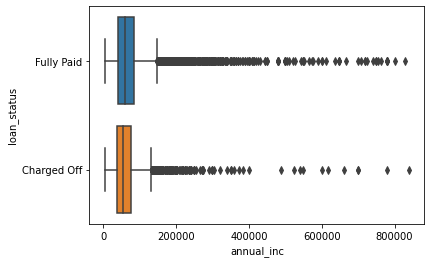

In [33]:
#Visualize data between loan_status and annual_inc after removal of outliers
sns.boxplot(df1.annual_inc,df1.loan_status)
plt.show()

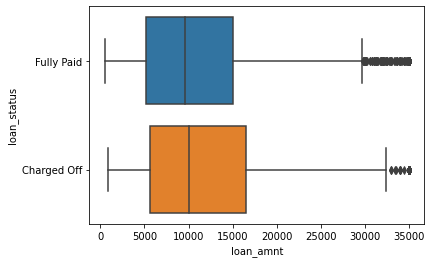

In [34]:
#Visualize data between loan_status and loan_amnt.
sns.boxplot(df1.loan_amnt,df1.loan_status)
plt.show()

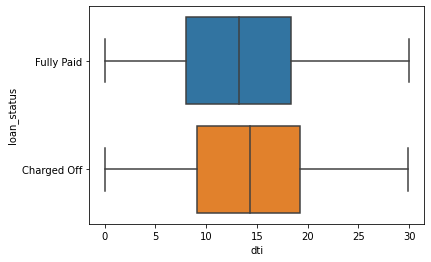

In [35]:
#Visualize data between loan_status and dti
sns.boxplot(df1.dti,df1.loan_status)
plt.show()

# Bivariate analysis

<AxesSubplot:xlabel='loan_status'>

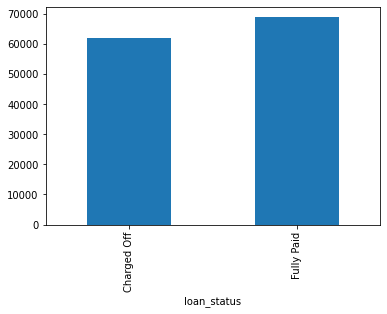

In [36]:
#Visualize data between loan_status and annual income in a bar plot
df1.groupby(['loan_status'])['annual_inc'].mean().plot.bar()


<AxesSubplot:xlabel='loan_status'>

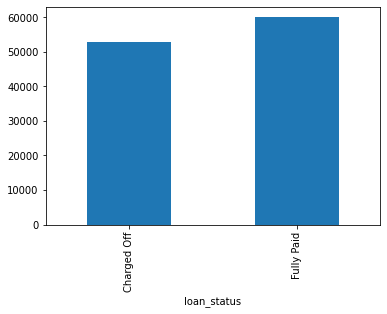

In [37]:
df1.groupby(['loan_status'])['annual_inc'].median().plot.bar()

# Inference from the data above : There is not much to infer from the mean and median bar plots, hence it would require the process of binning and further analysis

In [38]:
df1['incomeRange']=pd.qcut(df1.annual_inc,[0,0.33,0.66,1],["L","M","H"])

In [39]:
df1.incomeRange.value_counts()

M    12959
L    12806
H    12792
Name: incomeRange, dtype: int64

# Analyzing Loan amount against Income range and Loan Status

In [40]:
res=pd.pivot_table(data=df1,index="loan_status",columns ="incomeRange",values="loan_amnt",aggfunc=sum,margins = True,fill_value = 0)
res.head()

incomeRange,L,M,H,All
loan_status,,,,
Charged Off,18084525,24037625,25973450,68095600
Fully Paid,77818675,117030625,162965750,357815050
All,95903200,141068250,188939200,425910650


In [41]:
resPer = (res.div(res.iloc[:,-1],axis=0)*100)
resPer.head()

incomeRange,L,M,H,All
loan_status,,,,
Charged Off,26.557553,35.299821,38.142626,100.0
Fully Paid,21.748296,32.707016,45.544689,100.0
All,22.517211,33.121560,44.361229,100.0


In [42]:
##Apply customisations
resPlt = resPer.drop(index='All',axis=0)
resPlt = resPlt.drop(columns='All',axis=1)

<AxesSubplot:xlabel='incomeRange', ylabel='loan_status'>

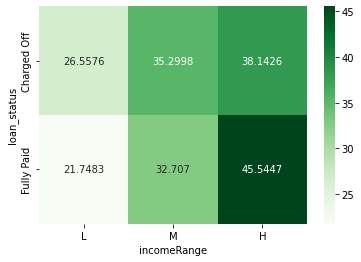

In [43]:
sns.heatmap(resPlt ,cmap="Greens",annot=True,fmt='g')

# Inference from the data above : The percentage of the amount Charged Off is in the increasing order with a positive correlation from the Lower income to the Higher income group. 

In [44]:
#loan_status for different purpose over median loan amount
resp=pd.pivot_table(data=df1,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='loan_status', ylabel='purpose'>

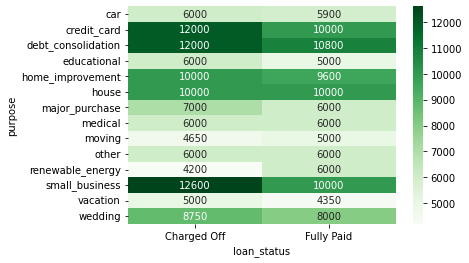

In [45]:
sns.heatmap(resp,cmap="Greens",annot=True,fmt='g')

# Inference from the analysis above : The loan_amount taken for creditcard,debt_consolidation,small_business are among the top Charged Off

# Analysis of Purpose aginst income range and loan amount  - TBC

In [46]:
resa=pd.pivot_table(data=df1,index="purpose",columns ="incomeRange",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))

<AxesSubplot:xlabel='incomeRange', ylabel='purpose'>

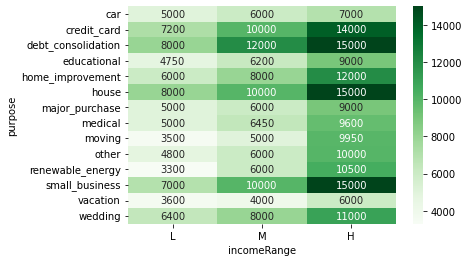

In [47]:
sns.heatmap(resa,cmap="Greens",annot=True,fmt='g')

# Analysis of purpose against income range -TBC

In [48]:
dfannual=df1[['purpose','incomeRange']]
resannual=pd.pivot_table(data=dfannual,index="purpose",columns ="incomeRange",aggfunc=len)
resannual.head()


incomeRange,L,M,H
purpose,,,
car,561,507,431
credit_card,1485,1730,1811
debt_consolidation,5961,6340,5745
educational,181,73,71
home_improvement,630,844,1398


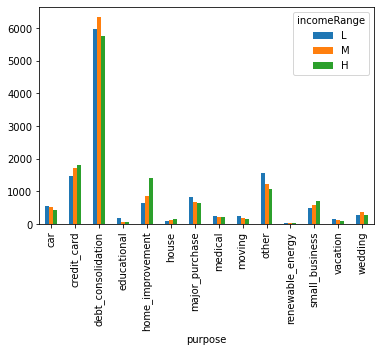

In [49]:
resannual.plot(kind="bar")
plt.show()

# Analysis of Purpose against loan status

In [50]:
dfannualdefault=df1[['purpose','incomeRange','loan_status','loan_amnt']]
dfannualdefault=dfannualdefault[dfannualdefault['loan_status']=='Charged Off']
dfannualdefault.head()


,purpose,incomeRange,loan_status,loan_amnt
1,car,L,Charged Off,2500
8,small_business,L,Charged Off,5600
9,other,L,Charged Off,5375
12,debt_consolidation,L,Charged Off,9000
14,other,H,Charged Off,10000


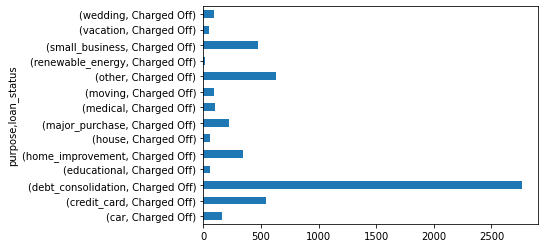

In [51]:
dfannualdefault.groupby(['purpose'])['loan_status'].value_counts().plot.barh()
#The largest number of loan is taken for debt_consolidation
plt.show()

# Inference from the above analysis : The number of defaulters are more for debt_consolidation loan applications followed by other ,small business ,crdedit card. 

# Analysis of Loan amount against purpose and loan status

In [52]:
resp_la =pd.pivot_table(data=dfannualdefault,index="purpose",columns ="loan_status",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.50))

<AxesSubplot:xlabel='purpose'>

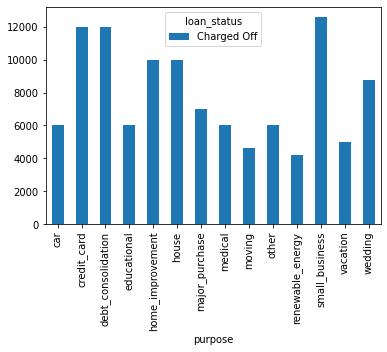

In [53]:
#sns.heatmap(resp_la,cmap="Greens",annot=True,fmt='g')
resp_la.plot(kind="bar")

# Inference from above analysis : The median loan amount charged off is higher for loans taken against small_business,debt_consolidation,credit card.

# Analysis of Percentage of Purpose against Annual income range and loan status

In [54]:
dfannualdefaultLst=df1[['purpose','incomeRange','loan_status','loan_amnt']]
dfannualdefaultLst=dfannualdefaultLst[dfannualdefaultLst['loan_status']=='Charged Off']
dfannualdefaultLst.head()
resannualLst=pd.pivot_table(data=dfannualdefaultLst,index=["purpose","loan_status"],columns ="incomeRange",aggfunc=len,margins=True,fill_value =0)
resannualLst.head()

loan_amnt                
incomeRange                            L    M    H   All
purpose            loan_status                          
car                Charged Off        75   49   36   160
credit_card        Charged Off       202  178  162   542
debt_consolidation Charged Off      1058  990  718  2766
educational        Charged Off        35   10   11    56
home_improvement   Charged Off        98  120  129   347

In [55]:
resannualLst.tail()

loan_amnt                  
incomeRange                          L     M     H   All
purpose          loan_status                            
renewable_energy Charged Off        11     2     6    19
small_business   Charged Off       143   182   150   475
vacation         Charged Off        25    19     9    53
wedding          Charged Off        35    34    27    96
All                               2223  1905  1498  5626

In [56]:
resannualLst.value_counts()

(loan_amnt, L)  (loan_amnt, M)  (loan_amnt, H)  (loan_amnt, All)
11              2               6               19                  1
21              16              22              59                  1
25              19              9               53                  1
35              10              11              56                  1
                34              27              96                  1
42              35              29              106                 1
55              23              14              92                  1
75              49              36              160                 1
98              120             129             347                 1
118             65              39              222                 1
143             182             150             475                 1
202             178             162             542                 1
305             182             146             633                 1
1058            990      

In [57]:
resannualPer = (resannualLst.div(resannualLst.iloc[:,-1],axis=0)*100)

In [58]:
resannualPer.head()

loan_amnt                             
incomeRange                             L          M          H    All
purpose            loan_status                                        
car                Charged Off  46.875000  30.625000  22.500000  100.0
credit_card        Charged Off  37.269373  32.841328  29.889299  100.0
debt_consolidation Charged Off  38.250181  35.791757  25.958062  100.0
educational        Charged Off  62.500000  17.857143  19.642857  100.0
home_improvement   Charged Off  28.242075  34.582133  37.175793  100.0

In [59]:
##Apply customisations
resannualPerPlt = resannualPer.drop(index='All',axis=0)
resannualPerPlt1 = resannualPerPlt.drop(resannualPerPlt.columns[-1],axis=1)

<AxesSubplot:ylabel='purpose,loan_status'>

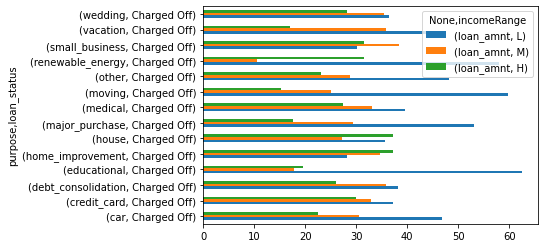

In [60]:
resannualPerPlt1.plot(kind="barh")

# Inference from the data above : On percentage analysis,Low income group creates more charge_offs when they apply for educational,moving,renewable energy loans.

In [61]:
dfannualpaid=df1[['purpose','incomeRange','loan_status']]
dfannualpaid=dfannualpaid[dfannualpaid['loan_status']=='Fully Paid']
dfannualpaid.head()
resannualpaid=pd.pivot_table(data=dfannualpaid,index=["purpose","loan_status"],columns ="incomeRange",margins=True,aggfunc=len,fill_value=0)
resannualpaid.head()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
car,Fully Paid,486,458,395,1339
credit_card,Fully Paid,1283,1552,1649,4484
debt_consolidation,Fully Paid,4903,5350,5027,15280
educational,Fully Paid,146,63,60,269
home_improvement,Fully Paid,532,724,1269,2525


In [62]:
resannualpaid = (resannualpaid.div(resannualpaid.iloc[:,-1],axis=0)*100)
resannualpaid.head()

,incomeRange,L,M,H,All
purpose,loan_status,,,,
car,Fully Paid,36.295743,34.204630,29.499627,100.0
credit_card,Fully Paid,28.612846,34.611954,36.775201,100.0
debt_consolidation,Fully Paid,32.087696,35.013089,32.899215,100.0
educational,Fully Paid,54.275093,23.420074,22.304833,100.0
home_improvement,Fully Paid,21.069307,28.673267,50.257426,100.0


In [63]:
resannualpaidPlt = resannualpaid.drop(index='All',axis=0)
resannualpaiPlt1 = resannualpaidPlt.drop(resannualpaidPlt.columns[-1],axis=1)

<AxesSubplot:xlabel='purpose,loan_status'>

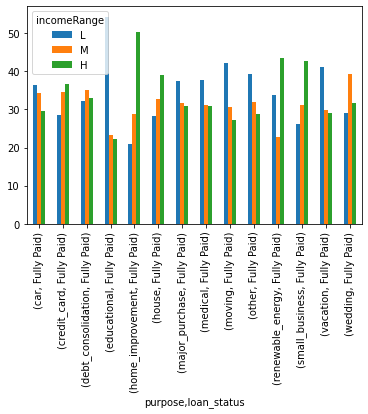

In [64]:
resannualpaiPlt1.plot(kind="bar")

# Inference from the data above : On percentage analysis,Low income group is highest in paying off educational loans but they are also highest in charge off's in the same catefory.

# Analysis Grade against Loan status

In [65]:
dfrisk = df1[['grade','loan_status']]
resrisk = pd.pivot_table(data=dfrisk,index="grade",columns="loan_status",aggfunc=len,margins=True,fill_value=0)
resrisk = (resrisk.div(resrisk.iloc[:,-1],axis=0)*100)
resrisk.head()



loan_status,Charged Off,Fully Paid,All
grade,,,
A,5.997808,94.002192,100.0
B,12.209751,87.790249,100.0
C,17.196883,82.803117,100.0
D,21.990559,78.009441,100.0
E,26.849418,73.150582,100.0


In [66]:

resriskPlt = resrisk.drop(index='All',axis=0)
resriskPlt1 = resriskPlt.drop(resriskPlt.columns[-1],axis=1)

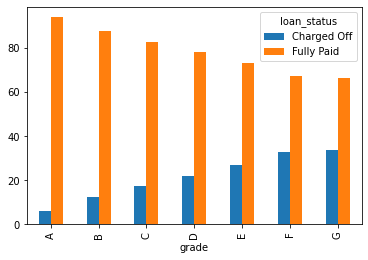

In [67]:
resriskPlt1.plot(kind="bar")
plt.show()

# Inference from the analysis above : The percentage of chargeoff increases with risk represented by higher Grades

<AxesSubplot:xlabel='grade', ylabel='purpose'>

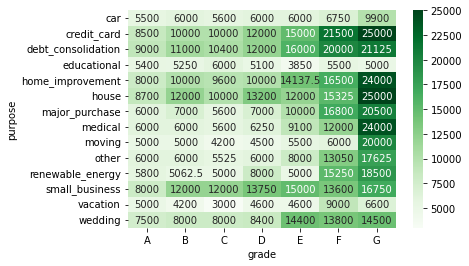

In [68]:
resg=pd.pivot_table(data=df1,index="purpose",columns ="grade",values="loan_amnt",aggfunc=lambda x: np.quantile(x,0.5))
sns.heatmap(resg,cmap="Greens",annot=True,fmt='g')

# Inference from the analysis above : High risk group needs loan more for credit_Card,medical,home_improvement purposes

In [69]:
dfriskSub = df1[['sub_grade','loan_status']]
resriskSub = pd.pivot_table(data=dfriskSub,index="sub_grade",columns="loan_status",margins=True,aggfunc=len,fill_value=0)
resriskSub  = (resriskSub.div(resriskSub.iloc[:,-1],axis=0)*100)

resriskSub.head()

resriskSubPlt = resriskSub.drop(index='All',axis=0)
resriskSubPlt1 = resriskSubPlt.drop(resriskSubPlt.columns[-1],axis=1)

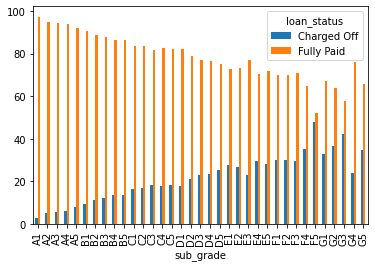

In [70]:
resriskSubPlt1.plot(kind="bar")
plt.show()

# Inference from the analysis above : The percentage of chargeoff increases with risk represented by higher Sub Grades

# Analysis of years in employment against term and loan status



In [71]:
df1.term.value_counts()

 36 months    29081
 60 months     9476
Name: term, dtype: int64

In [72]:
df1.term.isnull().sum()

0

In [73]:
dfempl=df1[['emp_length','term','loan_status']]
resempl=pd.pivot_table(data=dfempl,index=['emp_length','loan_status'],columns =['term'],aggfunc=len,fill_value=0)


In [74]:
resempl.head()

term                     36 months   60 months
emp_length loan_status                        
0          Charged Off         154          74
           Fully Paid          655         150
1 year     Charged Off         302         154
           Fully Paid         2280         431
10+ years  Charged Off         630         701

<AxesSubplot:xlabel='emp_length,loan_status'>

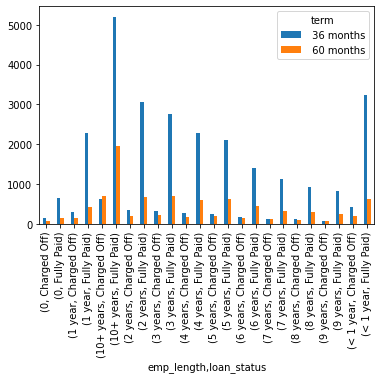

In [75]:
resempl.plot(kind="bar")

# Inference from analysis above : short term loans are mostly requested among all employee groups - TBD

In [76]:
dfemplgrade=df1[['grade','term']]
resemplg=pd.pivot_table(data=dfemplgrade,index=['grade'],columns =['term'],aggfunc=len)
resemplg.head()

term,36 months,60 months
grade,,
A,9643,394
B,9328,2343
C,5744,2083
D,3231,1853
E,868,1795


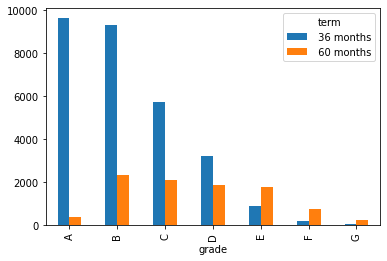

In [77]:
resemplg.plot(kind="bar")
plt.show()

# Inference from analysis above : while the credit score deteriorates, people tend to go for long term loans.

In [78]:
dfemplstat=df1[['emp_length','loan_status']]
resemplstat=pd.pivot_table(data=dfemplstat,index=['emp_length'],columns =['loan_status'],margins =True,aggfunc=len,fill_value=0)


In [79]:
resemplstat.head()


loan_status,Charged Off,Fully Paid,All
emp_length,,,
0,228,805,1033
1 year,456,2711,3167
10+ years,1331,7148,8479
2 years,566,3724,4290
3 years,555,3456,4011


In [80]:
resemplstat = (resemplstat.div(resemplstat.iloc[:,-1],axis=0)*100)

resemplstat.head()

resemplstatPlt = resemplstat.drop(index='All',axis=0)
resemplstatPlt1 = resemplstatPlt.drop(resemplstatPlt.columns[-1],axis=1)

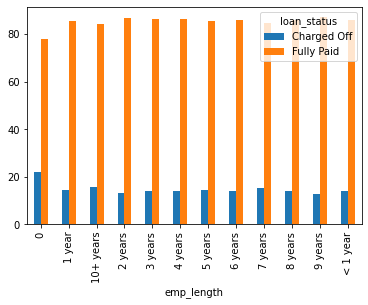

In [81]:
resemplstatPlt1.plot(kind="bar")
plt.show()

# People with '0' employement length have more percentage of chargeoff.

# Analysis dti against loan status

In [82]:
df1.dti.value_counts()

0.00     177
12.00     46
18.00     45
13.20     39
19.20     39
        ... 
28.26      1
28.95      1
25.77      1
27.20      1
25.43      1
Name: dti, Length: 2853, dtype: int64

In [83]:
df1.dti.isnull().sum()

0

In [84]:
df1['dtiRange']=pd.qcut(df1.dti,[0,0.33,0.66,1],["L","M","H"])
df1[['dti','dtiRange']]

,dti,dtiRange
0,27.65,H
1,1.00,L
2,8.72,L
3,20.00,H
5,11.20,M
...,...,...
39712,11.33,M
39713,6.40,L
39714,2.30,L
39715,3.72,L


In [85]:
dfdtRange=df1[['loan_status','dtiRange']]
dfdtRange.head()

,loan_status,dtiRange
0,Fully Paid,H
1,Charged Off,L
2,Fully Paid,L
3,Fully Paid,H
5,Fully Paid,M


In [86]:
resdti=pd.pivot_table(data=dfdtRange,index=['dtiRange'],columns =['loan_status'],aggfunc=len)
resdti.head()

loan_status,Charged Off,Fully Paid
dtiRange,,
L,1612,11126
M,1852,10868
H,2162,10937


<AxesSubplot:xlabel='dtiRange'>

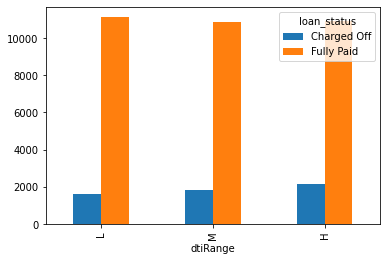

In [87]:
resdti.plot(kind="bar")

<AxesSubplot:xlabel='dtiRange'>

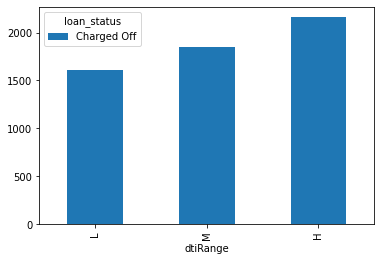

In [88]:
resdtplt = resdti[['Charged Off']]
resdtplt.plot(kind='bar')

# Inference from the analysis above : higher the Dti then higher the charged Off

# Analysis of Interest rate against Loan status

In [89]:
df1.int_rate.value_counts()

10.99    913
11.49    790
7.51     786
13.49    749
7.88     723
        ... 
16.96      1
18.36      1
16.15      1
16.01      1
16.20      1
Name: int_rate, Length: 370, dtype: int64

In [90]:
df1['intRange']=pd.qcut(df1.int_rate,[0,0.33,0.66,1],["L","M","H"])

In [91]:
dfint = df1[['loan_status','intRange']]

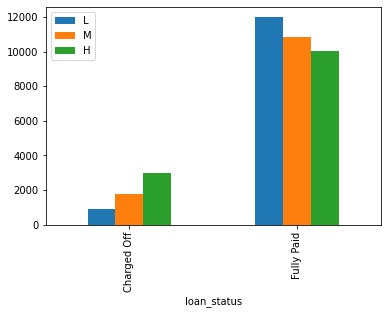

In [92]:
dfint.groupby('loan_status')['intRange'].value_counts().unstack().plot(kind='bar')
plt.show()

# Inference from the analysis above : High interest rates get more charged Off while Low interest rates gets fully Paid

# Analysis of why Low income group tops in Charge Off and Fully paid category of Educational Loans

In [93]:
dfLowIncome=df1[['incomeRange','loan_status','term','int_rate','grade','purpose']]
dfLowIncome.head()

,incomeRange,loan_status,term,int_rate,grade,purpose
0,L,Fully Paid,36 months,10.65,B,credit_card
1,L,Charged Off,60 months,15.27,C,car
2,L,Fully Paid,36 months,15.96,C,small_business
3,M,Fully Paid,36 months,13.49,C,other
5,L,Fully Paid,36 months,7.90,A,wedding


In [94]:
dfLowIncome=dfLowIncome[dfLowIncome.incomeRange =='L']
dfLowIncome=dfLowIncome[dfLowIncome.purpose =='educational']


In [95]:
dfLowIncome['intRange']=pd.qcut(dfLowIncome.int_rate,[0,0.33,0.66,1],["L","M","H"])

In [96]:
dfLowIncome.head()

,incomeRange,loan_status,term,int_rate,grade,purpose,intRange
25162,L,Fully Paid,60 months,18.67,F,educational,H
25328,L,Charged Off,36 months,13.23,C,educational,H
25415,L,Charged Off,36 months,13.23,C,educational,H
25591,L,Fully Paid,36 months,10.75,B,educational,M
26251,L,Fully Paid,36 months,7.51,A,educational,L


In [97]:
dfLowIncome=dfLowIncome[['loan_status','term','intRange']]

In [98]:
resLincome=pd.pivot_table(data=dfLowIncome,index=["loan_status","term"],columns =["intRange"],margins=True,aggfunc=len,fill_value=0)
resLincome.head()

intRange                 L   M   H  All
loan_status term                       
Charged Off  36 months   7  11  12   30
             60 months   1   0   4    5
Fully Paid   36 months  51  47  42  140
             60 months   1   1   4    6
All                     60  59  62  181

In [99]:
resLincome = (resLincome.div(resLincome.iloc[:,-1],axis=0)*100)
resLincome.head()
resLincomePlt = resLincome.drop(index='All',axis=0)
resemplstatPlt1 = resLincomePlt.drop(resLincomePlt.columns[-1],axis=1)

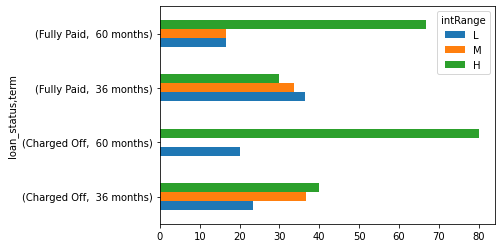

In [100]:
resemplstatPlt1.plot(kind="barh")
plt.show()


# Inference from the analysis above : For educational loans, when the interest rate is high, Low income group will get more charged Off for short term and long term loans. 

# Analysis of Home ownership against Loan status

In [101]:
df1.home_ownership.value_counts()


RENT        18475
MORTGAGE    17007
OWN          2974
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [102]:
df1 = df1[df1.home_ownership != 'NONE']

In [103]:
df1.home_ownership.isnull().sum()

0

In [104]:
dfHmeOwn = df1[['home_ownership','loan_status']]

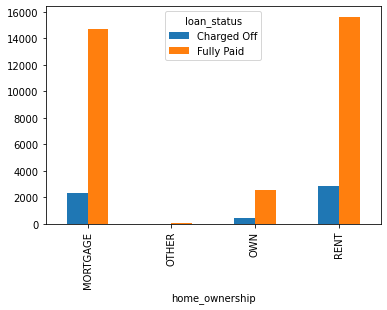

In [105]:
dfHmeOwn.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar')
plt.show()

# Inference from the analysis above : People who lives in Rented accomodation and those who has mortgage has more charged off than people who has Home ownership. 

# Analysis of Verification status against Loan status

In [106]:
df1.verification_status.value_counts()

Not Verified       16682
Verified           12202
Source Verified     9670
Name: verification_status, dtype: int64

In [107]:
df1.verification_status.isnull().sum()

0

In [108]:
dfVerifySts=df1[['loan_status','verification_status']]

In [109]:
resVerifySts=pd.pivot_table(data=dfVerifySts,index=['verification_status'],columns =['loan_status'],margins =True,aggfunc=len,fill_value=0)


In [110]:
#resVerifySts = (resVerifySts.div(resVerifySts.iloc[:,-1],axis=0)*100)
resVerifyStsPlt = resVerifySts.drop(index='All',axis=0)
resVerifyStsPlt1 = resVerifyStsPlt.drop(resVerifyStsPlt.columns[-1],axis=1)

In [111]:
resVerifyStsPlt1.head()

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,2142,14540
Source Verified,1434,8236
Verified,2050,10152


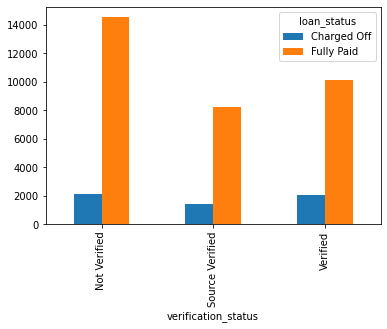

In [112]:
resVerifyStsPlt1.plot(kind="bar")
plt.show()

# Inference from the analysis above : The charged off cases of people with 'Not Verified' verification status is slightly high compared to others.